# Predicting the Quality of a White Wine

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

wine = pd.read_csv('white.csv', sep = ';')

In [95]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [96]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [97]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [98]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Indicates there are no missing values in the dataset

In [99]:
X = wine.drop(columns = ['quality'])
y = wine['quality']

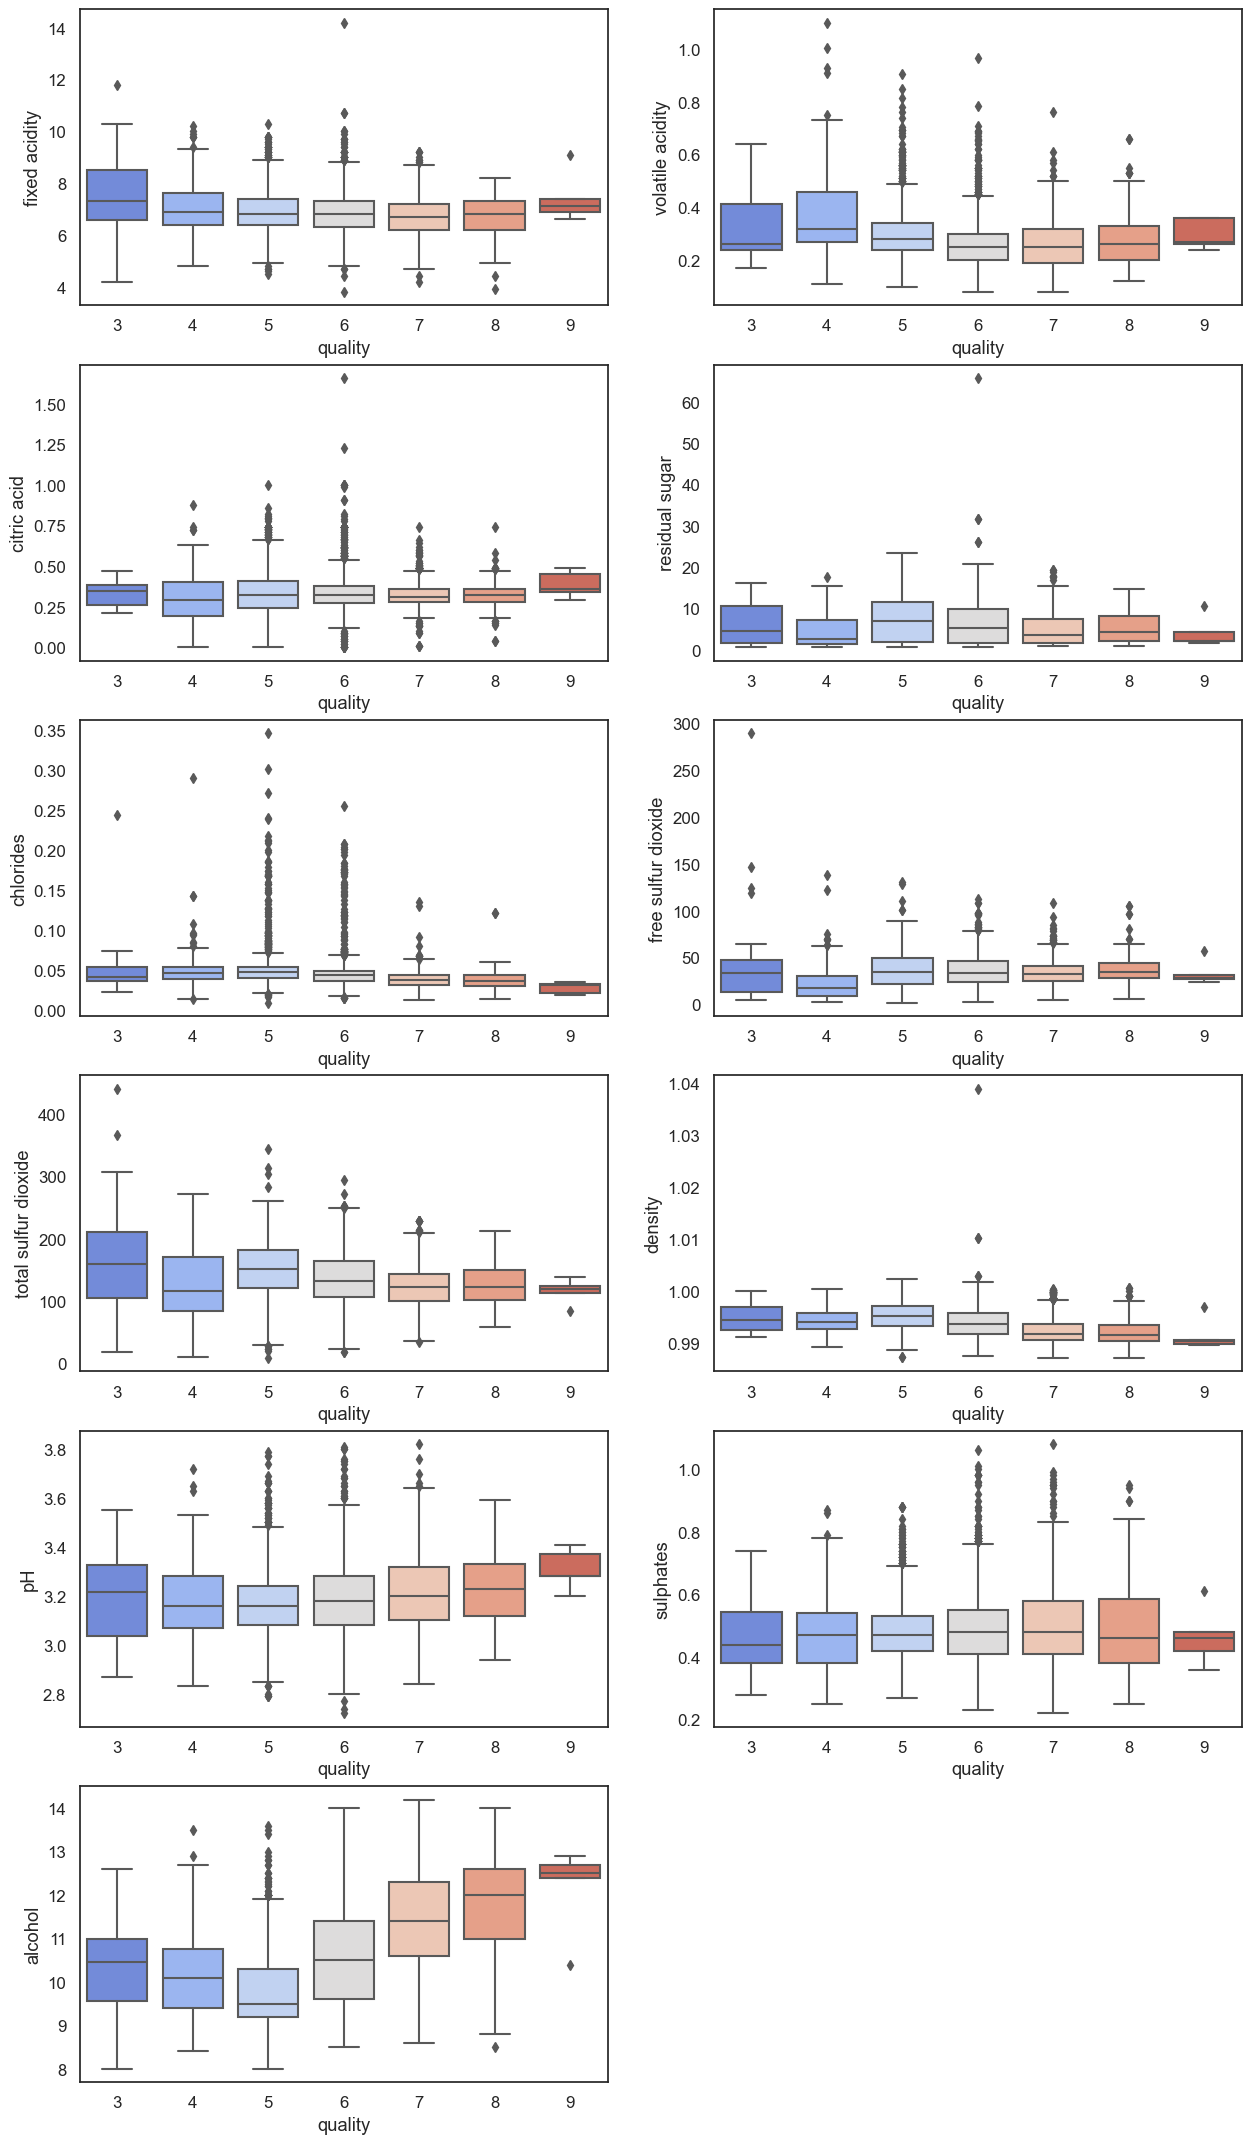

In [100]:
plt.figure(figsize = (15,50))
for i, column in enumerate(X.columns):
    plt.subplot(len(X.columns), 2, i+1)
    sns.boxplot(x = 'quality', y = column, data = wine, palette = 'coolwarm')
plt.show()

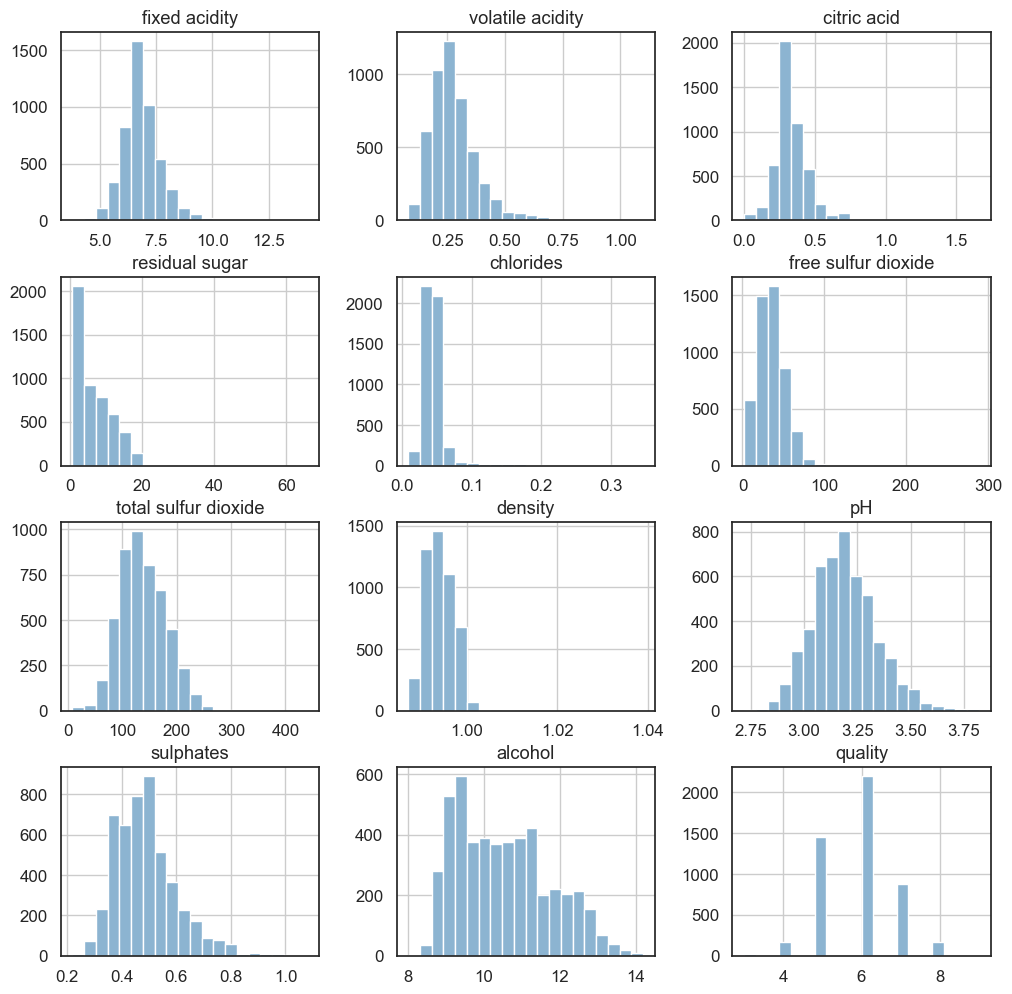

In [101]:
wine.hist(bins = 20, figsize = (12, 12))
plt.show()

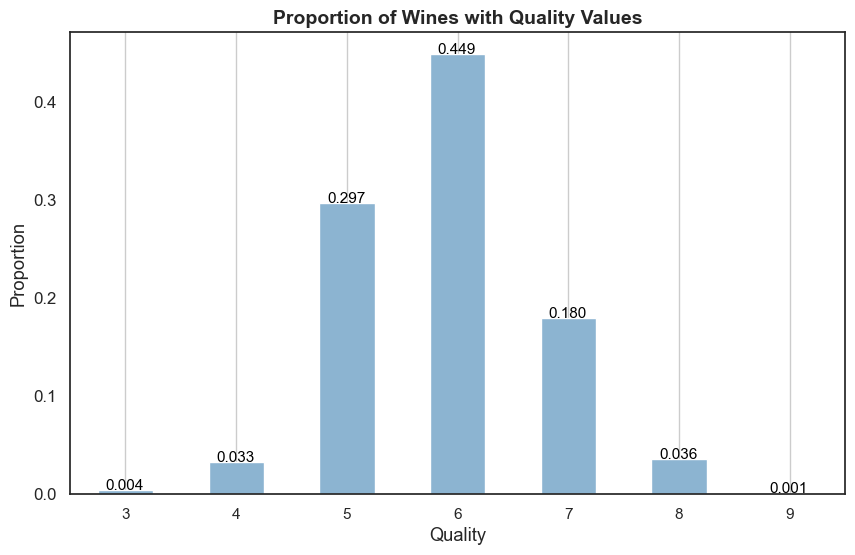

In [102]:
quality_counts = wine.quality.value_counts(normalize = True).sort_index(ascending = True)

plot = quality_counts.plot(kind = 'bar', figsize = (10, 6))

plot.set_xlabel('Quality')
plot.set_ylabel('Proportion')
plot.set_title('Proportion of Wines with Quality Values', fontsize = 14, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 11)
plot.xaxis.grid()

for i, v in enumerate(quality_counts):
    plot.text(i-0.18, v, f'{v:.3f}', fontsize = 11, color = 'black')
plt.show()


In [103]:
strat_train_set, strat_test_set = train_test_split(
    wine, test_size = 0.2, stratify = wine['quality'], random_state = 2)

strat_test_set['quality'].value_counts() / len(strat_test_set)

6    0.448980
5    0.296939
7    0.179592
8    0.035714
4    0.033673
3    0.004082
9    0.001020
Name: quality, dtype: float64

In [104]:
wine = strat_train_set.copy()

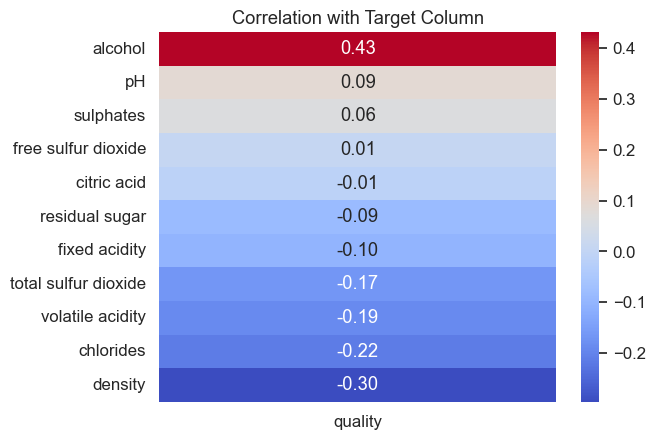

In [105]:
corr_matrix = wine.corr()
quality_corr = corr_matrix['quality'].drop('quality').sort_values(ascending = False)

sns.set(font_scale=1.1)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(quality_corr.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Target Column')
plt.show()

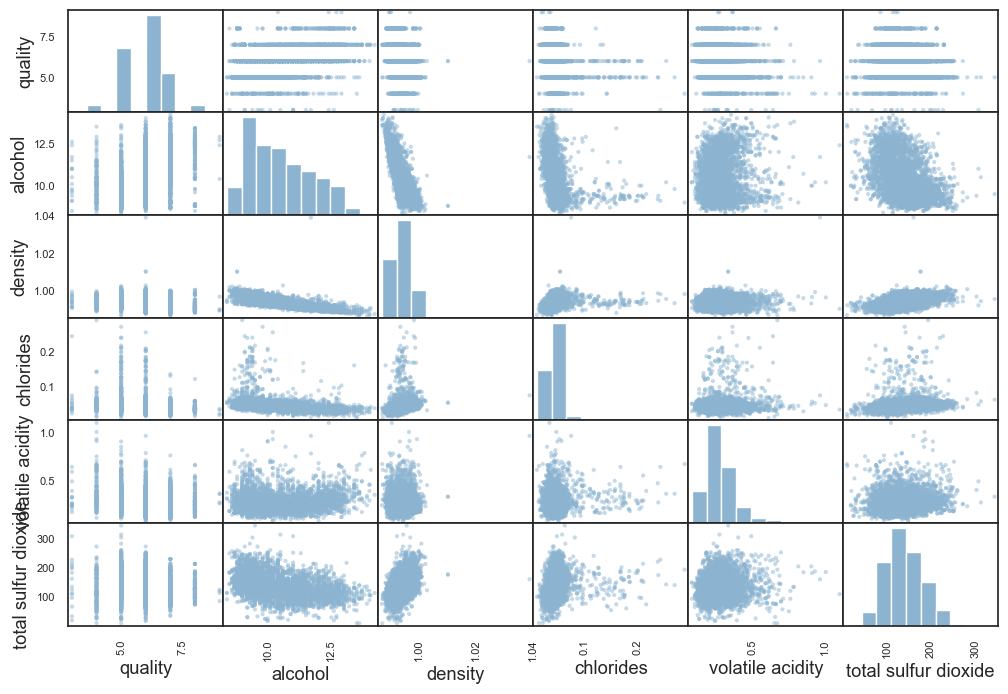

In [106]:
from pandas.plotting import scatter_matrix

attributes = ['quality','alcohol','density','chlorides','volatile acidity','total sulfur dioxide']
scatter_matrix(frame = wine[attributes], figsize = (12,8))
plt.show()

In [107]:
X_train = strat_train_set.drop('quality', axis = 1)
y_train = strat_train_set['quality'].copy()
X_train.shape, y_train.shape

((3918, 11), (3918,))

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)

array([[ 2.52264261, -0.76642223, -0.03520826, ..., -0.31857153,
        -1.1399901 , -0.57687548],
       [ 0.75669512,  0.40878185,  0.29264908, ..., -0.64858139,
        -0.52538908, -0.98570854],
       [-0.0674137 ,  0.89845022,  1.44014979, ...,  0.01143832,
        -0.43758893, -1.3945416 ],
       ...,
       [-0.53833303,  1.48605227, -0.52699428, ...,  0.34144817,
         0.26481223, -1.14924177],
       [-0.65606286, -0.66848856, -0.19913694, ...,  1.99149744,
         1.66961456,  0.40432386],
       [-1.00925236,  0.01704716, -0.36306561, ..., -0.31857153,
         0.08921194, -1.23100838]])

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [110]:
#initialize tree classifier
clf = DecisionTreeClassifier(random_state = 2)

In [111]:
#fit the model using the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2)

In [112]:
#make prediction from the model on the test set
X_test = strat_test_set.drop('quality', axis = 1)
y_test = strat_test_set['quality']
y_pred = clf.predict(X_test)

In [113]:
#compare predictions vs the test set using the accuracy_score
accuracy_score(y_pred, y_test)

0.6214285714285714

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [115]:
#initialize the model
rf = RandomForestClassifier(n_estimators = 10, random_state = 2, n_jobs = -1)

# find scores through cross validation
scores = cross_val_score(rf, X_test, y_test, cv = 5)

C:\Users\wbpar\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [116]:
# print all scores and then average them
print('Accuracy:', np.round(scores,3))
print('Accuracy mean: %0.3f' %(scores.mean()))

Accuracy: [0.541 0.52  0.526 0.52  0.48 ]
Accuracy mean: 0.517


In [118]:
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_fit = label_encoder.fit_transform(y_train)
y_test_fit = label_encoder.fit_transform(y_test)
xgb = XGBClassifier(booster = 'gbtree',
                   objective = 'multi:softprob',
                   max_depth = 10,
                   learning_rate = 0.01,
                   n_estimators = 100,
                   random_state = 2,
                   n_jobs = -1)

xgb.fit(X_train, y_train_fit)
y_pred = xgb.predict(X_test)

score = accuracy_score(y_pred, y_test_fit)
print('Score: %0.3f' %(score))

Score: 0.633
